In [2]:
import sys
sys.path.append('../script/')
from GeneticAlgorithm import *
from StreakingAlgorithm import *

%matplotlib inline
plt.style.use('classic')
plt.rc("figure",facecolor="w",figsize=(6,4))

# 1. Visualize Target True

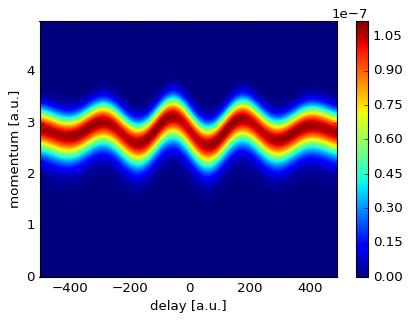

In [3]:
stk = Streaking(uv_E0    = 0.00534,#[au]
                uv_tau   = 2.8495,#[au] x5
                uv_b     = 0.29282,#[au]
                uv_w0    = 5.51248,#[au]
                ir_E0    = 0.00754,#[au]
                ir_tau   = 495.868,#[au]
                ir_w0    = 0.02683,#[au]
                Ip       = 0.90357 #[au])
                )
parr   = np.arange(0,5,0.02)
tauarr = np.arange(-500,500,10)
image  = stk.CalStreaking(parr,tauarr)
imshow(image,origin="lower",aspect="auto",
       extent=(tauarr.min(),tauarr.max(),parr.min(),parr.max())
      )
plt.xlabel("delay [a.u.]")
plt.ylabel("momentum [a.u.]")
plt.colorbar()

# 2. GA find uv_tau/uv_b

In [11]:
stk = Streaking(uv_tau=2.84950,uv_b=0.29282)
truth = stk.CalStreaking(parr, tauarr)

def TranslateDNA(DNA):
    para_upper = np.array([3,3])
    para_lower = np.array([0,0])
    para = DNA*(para_upper-para_lower)+para_lower
    return para

def DefineFitness(DNA,truth):
    coeff = TranslateDNA(DNA)
    parr  = np.arange(0,5,0.02)
    tauarr= np.arange(-500,500,10)
    
    #stk = Streaking(uv_tau=2.84950,uv_b=0.29282)
    #truth = stk.CalStreaking(parr,tauarr)
    
    stk = Streaking(uv_tau=2.84950*coeff[0], uv_b=0.29282*coeff[1])
    guess = stk.CalStreaking(parr,tauarr)
    
    var   = np.mean((truth-guess)**2)
    fitness = 1/var
    return fitness

In [36]:
ga = GA(pop_size    = 10,
        DNA_size    = 2, 
        DNA_fitness = DefineFitness,
        cross_rate  = 0.8,
        mutate_rate = 0.01,
        noise_rate  = 0.8,
        noise_amp   = 0.01,
        truthForFitness = truth
       )

# Run GA and Find Best DNA

In [37]:
for generation in range(10):
    ga.evolve()
    fitness  = ga.get_pop_fitness()
    best_DNA = ga.pop[np.argmax(fitness)]
    
    coeff = TranslateDNA(best_DNA)
    stk = Streaking(uv_tau=2.84950*coeff[0], uv_b=0.29282*coeff[1])
    guess = stk.CalStreaking(parr,tauarr)
    plt.imshow(guess,origin="lower",aspect="auto",
               extent=(tauarr.min(),tauarr.max(),parr.min(),parr.max())
              )
    plt.xlabel("delay [a.u.]")
    plt.ylabel("momentum [a.u.]")
    plt.colorbar()
    plt.title("tau:{:4.3f}, b:{:4.3f}".format(coeff[0],coeff[1]))
    plt.savefig('../plot/phaseretrival/{}.png'.format(generation),dpi=200)
    plt.close()

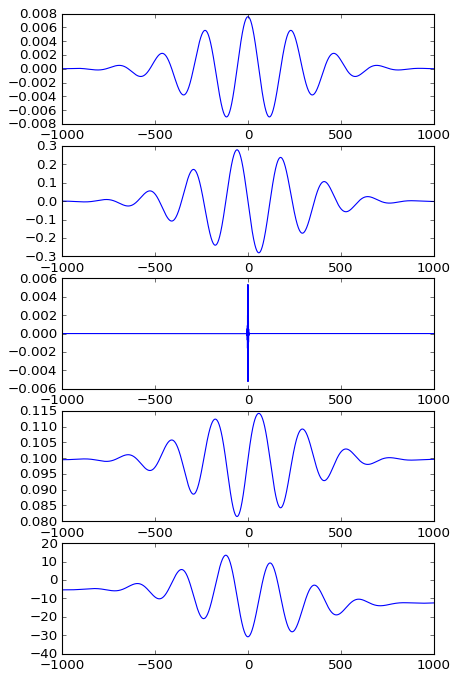

In [4]:
plt.figure(figsize=(6,10))
plt.subplot(5,1,1)
plot(stk.time,stk.ir_recoE)
plt.subplot(5,1,2)
plot(stk.time,stk.ir_recoA)
plt.subplot(5,1,3)
plot(stk.time,stk.uv_recoE)
plt.subplot(5,1,4)
plot(stk.time,stk.DipoleMoment(2+stk.ir_recoA))
plt.subplot(5,1,5)
plot(stk.time,stk.IR_RecoPHI(p=2))